In [144]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [145]:
mpl.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams["mathtext.default"] = 'regular'
#optional settings:
# allows us to open the file in illustrator to edit stuff.
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.size'] = 12


In [146]:
# This is for using seaborn
sns.set_theme(style="white")
sns.set_style('ticks')
plt.rcParams['font.size'] = 8
plt.rc('axes', titlesize=8)


In [147]:
data = pd.read_excel("../manuscript_data.xlsx", sheet_name="covariation")
data.head(3)

,Locality,Lithology,sample,Hg,TOC,Al,Fe,V
0,Shanggang,SHA,SHA 324 C+iso,15.9,0.453358,1.009523,0.851051,13.6
1,Shanggang,SHA,SHA 325 C+iso,4.3,0.048060,NaN,NaN,NaN
2,Shanggang,SHA,SHA 506 iso,6.4,0.028917,NaN,NaN,NaN


In [148]:
sha_Hg = data[data['Locality']=='Shanggang']['Hg']
qia_Hg = data[data['Locality']=='Qiakong']['Hg']
ja_Hg = data[data['Locality']=='Jebel Aweri']['Hg']

sha_TOC = data[data['Locality']=='Shanggang']['TOC']
qia_TOC = data[data['Locality']=='Qiakong']['TOC']
ja_TOC = data[data['Locality']=='Jebel Aweri']['TOC']

sha_Al = data[data['Locality']=='Shanggang']['Al']
qia_Al = data[data['Locality']=='Qiakong']['Al']
ja_Al = data[data['Locality']=='Jebel Aweri']['Al']

sha_Fe = data[data['Locality']=='Shanggang']['Fe']
qia_Fe = data[data['Locality']=='Qiakong']['Fe']
ja_Fe = data[data['Locality']=='Jebel Aweri']['Fe']

sha_V = data[data['Locality']=='Shanggang']['V']
qia_V = data[data['Locality']=='Qiakong']['V']

In [149]:
y=[sha_Hg, qia_Hg, ja_Hg]
x1=[sha_TOC, qia_TOC, ja_TOC]
x2=[sha_Al, qia_Al, ja_Al]
x3 = [sha_Fe, qia_Fe, ja_Fe]
x4 = [sha_V, qia_V]

In [150]:
"""This function takes 2 inputs, x and y, and returns the corresponding rho and p values
calculated for the spearmans rank correlation function. x and y are lists of data for which this calculation is needed."""

def spearman(x, y):
    from scipy.stats import spearmanr
    out=[]
    for i in range(len(x)):
        rho, p =spearmanr(x[i], y[i], nan_policy='omit')
        result = rho, p
        out.append(result)
    df = pd.DataFrame(out, columns = ['rho', 'p'])
    return df

spearman(x1,y)

,rho,p
0,0.490468,0.000052
1,0.571443,0.000095
2,0.172519,0.493629


In [151]:
x_variable = [x1, x2, x3, x4]

for i in range(len(x_variable)):
    count=0
    result = spearman(x_variable[i], y)
    # result.to_excel(f'../output{count}.xlsx')
    count+=1
    # print(result)
    

In [152]:
Hg = data["Hg"]

meta NOT subset; don't know how to subset; dropped


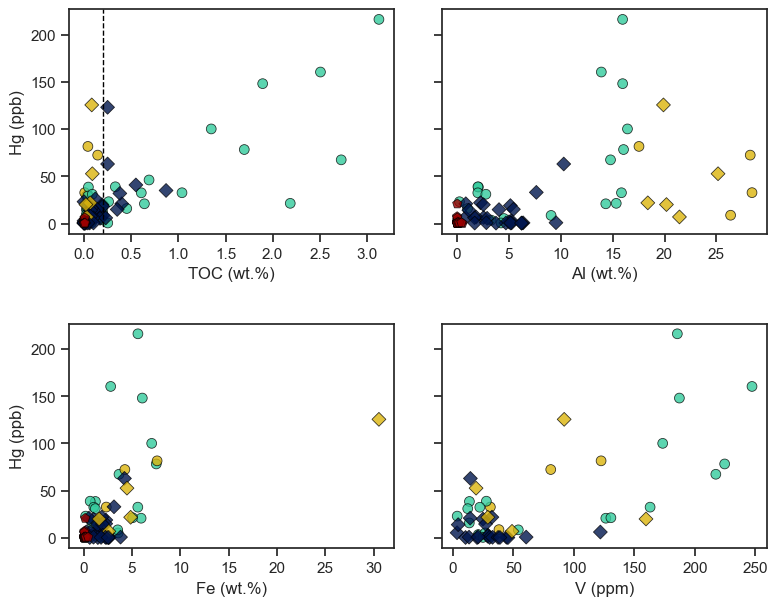

In [158]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2,
                                figsize=(9, 7), sharey=True)
colors = ['#33cb9c', '#DBB40C', '#00164e', '#DBB40C', '#9b0000']
markers = ['o','o', 'D','D', 'p']
fig.subplots_adjust(hspace=0.4, wspace=0.15)

#define the variables needed to iterably make the figures.
subs = ['TOC', 'Al', 'Fe', 'V']
ax = [ax0, ax1, ax2, ax3]
xlabels = [ "TOC (wt.%)", "Al (wt.%)", "Fe (wt.%)","V (ppm)"]

# make the subplots using a for loop.
for ix, sub in enumerate(subs):
    sns.scatterplot(data=data, x=data[sub], y=Hg, ax=ax[ix],
                    color='black', edgecolor='black', legend=False,
                    s=50, hue='Lithology', palette=colors, alpha=0.8,
                    style='Lithology', markers=markers,
                    )
    ax[ix].tick_params(labelsize=11)
    ax[ix].set_xlabel(xlabels[ix], fontsize=12)
    ax[ix].set_ylabel("Hg (ppb)", fontsize=12)
ax0.axvline(x=0.2, linestyle='--', color='black', linewidth=1)
plt.savefig("../plots/covariation.pdf")
